# Understanding spiking networks through convex optimization - Figure 4
This notebook produces the results of Figure 4 in the paper we analyze. I am changing the codes to use 1) Fashion MMIST dataset and 2) Heidelberg Digits dataset to train the network.

### Imports

In [1]:
import plotting
import numpy as np
import numba as nb
from snn_cvx import run_snn, update_weights

In [2]:
import holoviews as hv
hv.extension('matplotlib')

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W

### Network parameters

In [8]:
# Setting up dimensions
M = 7 # The dimensionality of the input
K = 3 # The dimensionality of the output
N = 300 # The number of neurons in the network

# Iniatilize network parameters
random_state = np.random.RandomState(seed=4)
# This line initializes the synaptic weights of the G matrix (input-to-neuron connections) randomly using the rand function from the random_state object. The resulting matrix has dimensions (N, M).
G_weights_init = random_state.rand(N, M) # 300 * 7
# This line normalizes the G weights along each row (axis=1) to have unit L2 norm. It ensures that the weights are scaled appropriately.
G_weights_init /= np.linalg.norm(G_weights_init, axis=1)[:, None] # Make the sum of each element's square (L2 Norm) in a row to be 1
#  This line defines a scaling factor for the D matrix (neuron-to-neuron connections) compared to the G matrix. 
scale = 0.1 # scaling of D compared to G
# This line initializes the synaptic weights of the D matrix by transposing the G weights and scaling them by the scale factor. The resulting matrix has dimensions (M, N).
D_weights_init = G_weights_init.T*scale  # 7 * 300
# This line initializes the synaptic weights of the F matrix (neuron-to-output connections) randomly using the randn function from the random_state object. The resulting matrix has dimensions (N, K).
F_weights_init = random_state.randn(N, K)
# This line normalizes the F weights along each row (axis=1) to have unit L2 norm, similar to step 4.
F_weights_init /= np.linalg.norm(F_weights_init, axis=1)[:, None]
# This line calculates the initial values of the omega vector (bias terms) by taking the negative matrix multiplication of the G weights and D weights. The resulting vector has dimensions (N,N).
omega_init = -G_weights_init @ D_weights_init
# This line initializes the firing thresholds for each neuron to 1. The resulting vector has dimensions (N,)
thresholds_init = np.ones(N)
# These lines define some hyperparameters of the network, such as the leak term, voltage noise standard deviation, and learning rate.
leak = 2
sigma_V = 0.1
mu = 0.1

### Learning parameters

In [4]:
T_l = 5 # trial time
dt_l = 1e-04 # simulation time-step during learning
t_span_l = np.arange(0, T_l, dt_l)
num_bins_l = t_span_l.size
buffer_bins_l = int(0.5/dt_l) # time for input onset
buffer_learning_bins = buffer_bins_l + buffer_bins_l # time before learning starts
alpha_init = 1e-01 # Initial learning rate
leak_thresh_init =  1e-03 # Initial threshold drift
decay = 1e-03 # Decay of learning rate across epochs
num_datapoints = 8
num_iter = 750

### Build training set

In [5]:
# get all possible pixel combinations
# The input data each time is a 1*3 vector?
x_train = np.array([[i, j, k] for i in range(2) for j in range(2) for k in range(2)]).astype(float)

# generate a target for each pixel combination (not that the target for no active pixels is a constant across the output dimensions)
y_target = np.identity(M+1)[:, 1:]*3 
y_target+=3

### Train the network

In [7]:
# initialize parameters
D_weights = D_weights_init.copy()
G_weights = G_weights_init.copy()
F_weights = F_weights_init.copy()
omega = omega_init.copy()
thresholds = thresholds_init.copy()


# initialize storage arrays
thresholds_array_fit = np.zeros((N, num_iter))
F_weights_array_fit = np.zeros((N, K, num_iter))
x_sample = np.zeros((K, num_bins_l))

# data index list
data_index_list = np.arange(num_datapoints)
    
for _iter in range(num_iter):
    if _iter % 99==0:
        print('iterations '+str(_iter+1)+' of '+str(num_iter), end='\r', flush=True)
        
    # shuffle inputs
    np.random.shuffle(data_index_list)
    
    # decay learning rate
    alpha = alpha_init * np.exp(-decay * (_iter + 1))
   
    # run network for each input
    for data_index in data_index_list:
        x_sample[:, buffer_bins_l:] = x_train[data_index, :][:, None] # from col 5000-50000 are replace with the sample data
        y_sample = y_target[data_index, :]
        # update weights with optimization function
        thresholds, F_weights = update_weights(
            x_sample,
            y_sample,
            F_weights,
            G_weights,
            omega,
            thresholds,
            buffer_learning_bins,
            dt_l,
            leak,
            leak_thresh_init*np.exp(-decay * (_iter + 1)),
            alpha,
            alpha,
            mu,
            sigma_V
        )
    
    # store updated parameters
    thresholds_array_fit[:, _iter] = thresholds
    F_weights_array_fit[:, :, _iter] = F_weights

    
F_weights_fit = F_weights_array_fit[:, :, -1]
thresholds_fit = thresholds_array_fit[:, -1]


KeyboardInterrupt: 

# Investigate resulting spiking network

### Setup input stimulus

In [7]:
np.random.seed(2) 

# Stimulus settings
Tend = 26
dt = 1e-4
times = np.arange(0, Tend, dt)
nT = len(times)
tstart = 1/dt # stimulus onset
stimlen = int(1/dt) # length of each stimulus
gap = int(0.5/dt) # gap between each stimulus

# perturbation parameters
sigma_stim = 0.1
sigma_OU = 0.05
leak_OU = 10

# build stimulus
x = np.zeros((K, nT))
count = 0
for stim in np.arange(tstart, nT, stimlen+gap, dtype=int):
    if count%(M+1) > 0:
        # fill in noisy version of the stimulus, if any pixel is on
        x[:, stim:stim+stimlen] = (x_train[count%(M+1), :]+sigma_stim*np.random.randn(K))[:, None]
    count += 1
    
# smoothen stimulus slightly to avoid discontinuities
x_kernel = np.linspace(-1, 1, 1000)
kernel_sigma = .1
smoothen_kernel = np.exp(-x_kernel**2/kernel_sigma**2)
smoothen_kernel/=smoothen_kernel.sum()
for i_dim in range(K):
    x[i_dim, :] = np.convolve(x[i_dim, :], smoothen_kernel, 'same')
    
# generate OU noise
noise = np.random.randn(K, nT) # white noise
noiseOU = np.zeros((K, nT))
for t in range(1, nT):
    noiseOU[:, t] = noiseOU[:, t-1] + dt*(-noiseOU[:, t-1]*leak_OU) + sigma_OU*noise[:, t-1]*np.sqrt(2*dt*leak_OU)

### Run network

In [8]:
silence_T = int(nT/2) # at what time-step to silence neuron
silence_prop = 0.4 # which proportion to silence
delay = 20 # number of timesteps of synaptic delay in recurrent connections
firing_rates, spikes, V_membrane, I_E, I_I = run_snn(x, noiseOU, F_weights_fit, omega, thresholds_fit, dt, leak, mu, sigma_V, silence_T, silence_prop, delay)
y_sim = D_weights@firing_rates

### Plot results

D:\Softwares\Anaconda\envs\spike\lib\site-packages\holoviews\plotting\mpl\annotation.py:117: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  return [axis.axvspan(*positions, **opts)]
D:\Softwares\Anaconda\envs\spike\lib\site-packages\holoviews\plotting\mpl\annotation.py:117: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  return [axis.axvspan(*positions, **opts)]


:Layout
   .Image.I     :Image   [Time (s),Input x]   (z)
   .Overlay.I   :Overlay
      .Curve.I   :Curve   [Time (s)]   (Readouts)
      .Curve.II  :Curve   [Time (s)]   (Readouts)
      .Curve.III :Curve   [Time (s)]   (Readouts)
      .Curve.IV  :Curve   [Time (s)]   (Readouts)
      .Curve.V   :Curve   [Time (s)]   (Readouts)
      .Curve.VI  :Curve   [Time (s)]   (Readouts)
      .Curve.VII :Curve   [Time (s)]   (Readouts)
   .Overlay.II  :Overlay
      .Spikes.I          :Scatter   [Time (s)]   (Neuron)
      .Spikes.II         :Scatter   [Time (s)]   (Neuron)
      .Spikes.III        :Scatter   [Time (s)]   (Neuron)
      .Spikes.IV         :Scatter   [Time (s)]   (Neuron)
      .Spikes.V          :Scatter   [Time (s)]   (Neuron)
      .Spikes.VI         :Scatter   [Time (s)]   (Neuron)
      .Spikes.VII        :Scatter   [Time (s)]   (Neuron)
      .Spikes.VIII       :Scatter   [Time (s)]   (Neuron)
      .Spikes.IX         :Scatter   [Time (s)]   (Neuron)
      .Spikes.X          :Scatter   [Time (s)]   (Neuron)
      .Spikes.XI         :Scatter   [Time (s)]   (Neuron)
      .Spikes.XII        :Scatter   [Time (s)]   (Neuron)
      .Spikes.XIII       :Scatter   [Time (s)]   (Neuron)
      .Spikes.XIV        :Scatter   [Time (s)]   (Neuron)
      .Spikes.XV         :Scatter   [Time (s)]   (Neuron)
      .Spikes.XVI        :Scatter   [Time (s)]   (Neuron)
      .Spikes.XVII       :Scatter   [Time (s)]   (Neuron)
      .Spikes.XVIII      :Scatter   [Time (s)]   (Neuron)
      .Spikes.XIX        :Scatter   [Time (s)]   (Neuron)
      .Spikes.XX         :Scatter   [Time (s)]   (Neuron)
      .Spikes.XXI        :Scatter   [Time (s)]   (Neuron)
      .Spikes.XXII       :Scatter   [Time (s)]   (Neuron)
      .Spikes.XXIII      :Scatter   [Time (s)]   (Neuron)
      .Spikes.XXIV       :Scatter   [Time (s)]   (Neuron)
      .Spikes.XXV        :Scatter   [Time (s)]   (Neuron)
      .Spikes.XXVI       :Scatter   [Time (s)]   (Neuron)
      .Spikes.XXVII      :Scatter   [Time (s)]   (Neuron)
      .Spikes.XXVIII     :Scatter   [Time (s)]   (Neuron)
      .Spikes.XXIX       :Scatter   [Time (s)]   (Neuron)
      .Spikes.XXX        :Scatter   [Time (s)]   (Neuron)
      .Spikes.XXXI       :Scatter   [Time (s)]   (Neuron)
      .Spikes.XXXII      :Scatter   [Time (s)]   (Neuron)
      .Spikes.XXXIII     :Scatter   [Time (s)]   (Neuron)
      .Spikes.XXXIV      :Scatter   [Time (s)]   (Neuron)
      .Spikes.XXXV       :Scatter   [Time (s)]   (Neuron)
      .Spikes.XXXVI      :Scatter   [Time (s)]   (Neuron)
      .Spikes.XXXVII     :Scatter   [Time (s)]   (Neuron)
      .Spikes.XXXVIII    :Scatter   [Time (s)]   (Neuron)
      .Spikes.XXXIX      :Scatter   [Time (s)]   (Neuron)
      .Spikes.XL         :Scatter   [Time (s)]   (Neuron)
      .Spikes.XLI        :Scatter   [Time (s)]   (Neuron)
      .Spikes.XLII       :Scatter   [Time (s)]   (Neuron)
      .Spikes.XLIII      :Scatter   [Time (s)]   (Neuron)
      .Spikes.XLIV       :Scatter   [Time (s)]   (Neuron)
      .Spikes.XLV        :Scatter   [Time (s)]   (Neuron)
      .Spikes.XLVI       :Scatter   [Time (s)]   (Neuron)
      .Spikes.XLVII      :Scatter   [Time (s)]   (Neuron)
      .Spikes.XLVIII     :Scatter   [Time (s)]   (Neuron)
      .Spikes.XLIX       :Scatter   [Time (s)]   (Neuron)
      .Spikes.L          :Scatter   [Time (s)]   (Neuron)
      .Spikes.LI         :Scatter   [Time (s)]   (Neuron)
      .Spikes.LII        :Scatter   [Time (s)]   (Neuron)
      .Spikes.LIII       :Scatter   [Time (s)]   (Neuron)
      .Spikes.LIV        :Scatter   [Time (s)]   (Neuron)
      .Spikes.LV         :Scatter   [Time (s)]   (Neuron)
      .Spikes.LVI        :Scatter   [Time (s)]   (Neuron)
      .Spikes.LVII       :Scatter   [Time (s)]   (Neuron)
      .Spikes.LVIII      :Scatter   [Time (s)]   (Neuron)
      .Spikes.LIX        :Scatter   [Time (s)]   (Neuron)
      .Spikes.LX         :Scatter   [Time (s)]   (Neuron)
      .Spikes.LXI        :Scatter   [Time (s)]   (Neuron)
    
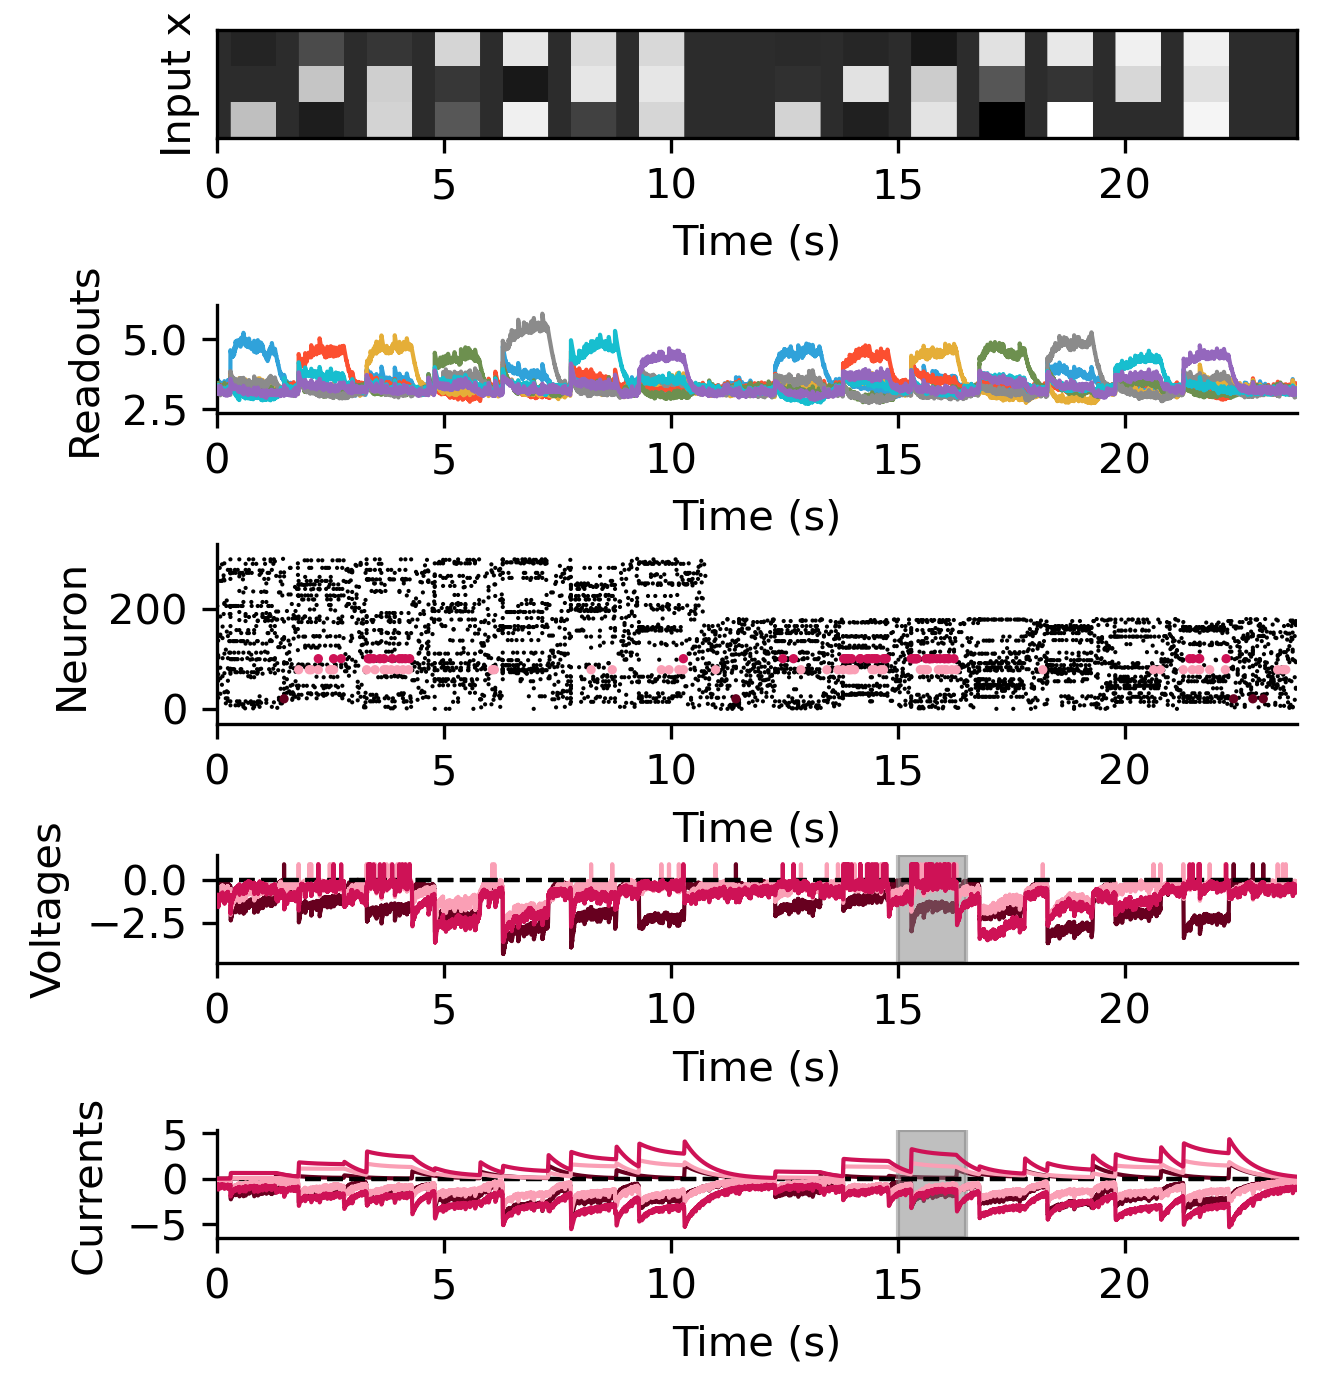

In [11]:
%%opts Image [aspect=10 yticks=0] (cmap='gray')
%%opts Overlay [show_legend=False show_title=False]
%%opts Curve [aspect=10] (linewidth=1) {+axiswise} Overlay [show_legend=False show_title=False] Layout [sublabel_format=None]
%%opts Scatter [aspect=10] Scatter.spikes [aspect=6] (s=1 color='k')
%%opts Scatter.spikes2 [aspect=6] (s=5)
%%output dpi=300 fig='png'

# waiting time before plotting
tstart = 2.2
tend = Tend-tstart

# choose example neurons to plot, and their colors
exneurons = [20, 78, 100]
color_exneurons = ['#67001f', '#fa9fb5', '#ce1256', '#df65b0']

# plot the input stimulus
fig_x = hv.Image(x, bounds=(-tstart, 0, Tend-tstart, 3), kdims=['Time (s)', 'Input x'])

# plot the read-outs
colors = plotting.colors
fig_readouts = hv.Overlay()
for i in range(0, M):
    img_i = hv.Curve(zip(times-tstart, y_sim[i, :]), kdims='Time (s)', vdims='Readouts').opts(color=colors[(i)%len(colors)])
    fig_readouts *= img_i

# plot the spikes of active neurons
fig_spikes = plotting.spike_plot(times-tstart, spikes[spikes.sum(axis=1)>0, :], 0, 1)
for i, n in enumerate(exneurons):
    fig_spikes *= plotting.plot_spikes_single(times-tstart, spikes[n, :], color_exneurons[i], base_offset=n)

# plot the currents (relative to the thresholds)
fig_I = hv.Overlay()
thresholds_pos, thresholds_neg = thresholds.copy(), thresholds.copy() 
thresholds_pos[thresholds<0]=0
thresholds_neg[thresholds>0]=0
for i, n in enumerate(exneurons):
    fig_inh = hv.Curve(zip(times-tstart, I_I[n, :]-thresholds_neg[n]), kdims='Time (s)', vdims='Currents').opts(color=color_exneurons[i])
    fig_ex = hv.Curve(zip(times-tstart, I_E[n, :]-thresholds_pos[n]),  kdims='Time (s)', vdims='Currents').opts(color=color_exneurons[i])
    fig_I *= fig_inh*fig_ex*hv.HLine(0).opts(linestyle='--', color='k', linewidth=1)
    
# plot the voltages (relative to the thresholds)
fig_V = hv.Overlay()
for i, n in enumerate(exneurons):
    fig_V *= hv.Curve(zip(times-tstart, V_membrane[n, :] + spikes[n, :] - thresholds[n]), kdims='Time (s)', vdims='Voltages').opts(color=color_exneurons[i], alpha=1)*hv.HLine(0).opts(linestyle='--', color='k', linewidth=1)

# Choose time-points to slice and zoom-in on (see next cell)    
t1 = 15 
t2 = 16.5
    
# combine all    
fig_tot = (fig_x[0:tend] +
           fig_readouts[0:tend] +
           fig_spikes[0:tend]*hv.Curve([0]) +
           fig_V[0:tend]*hv.VSpan(t1, t2).opts(color='gray') +
           fig_I[0:tend]*hv.VSpan(t1, t2).opts(color='gray') 
          ).cols(1)

xdim = hv.Dimension('Time (s)', range=(0, tend))
fig_tot.redim(x=xdim)

Zoom in on specific time-points (between t1 and t2 in previous block)
(note, in Holoviews you can slice the x-axis according the the actual x-values)

In [10]:
%%opts Curve [aspect=3 xticks=3 yticks=3] (alpha=1 linewidth=1) {+axiswise} Overlay [show_legend=False show_title=False] Layout [sublabel_format=None]
%%output dpi=300 fig='svg'

(fig_V[t1:t2].opts(xaxis='bare')+fig_I[t1:t2]).cols(1)   

:Layout
   .Overlay.I  :Overlay
      .Curve.I   :Curve   [Time (s)]   (Voltages)
      .HLine.I   :HLine   [x,y]
      .Curve.II  :Curve   [Time (s)]   (Voltages)
      .HLine.II  :HLine   [x,y]
      .Curve.III :Curve   [Time (s)]   (Voltages)
      .HLine.III :HLine   [x,y]
   .Overlay.II :Overlay
      .Curve.I   :Curve   [Time (s)]   (Currents)
      .Curve.II  :Curve   [Time (s)]   (Currents)
      .HLine.I   :HLine   [x,y]
      .Curve.III :Curve   [Time (s)]   (Currents)
      .Curve.IV  :Curve   [Time (s)]   (Currents)
      .HLine.II  :HLine   [x,y]
      .Curve.V   :Curve   [Time (s)]   (Currents)
      .Curve.VI  :Curve   [Time (s)]   (Currents)
      .HLine.III :HLine   [x,y]